link to dataset site: 
https://archive.ics.uci.edu/dataset/936/national+poll+on+healthy+aging+(npha)

# Step 2: Explore the Dataset

In [1]:
#@title Install the What-If Tool widget if running in colab {display-mode: "form"}

#Below are the installs required
#!pip install --upgrade witwidget
#!pip install tensorflow==2.15
#!pip install protobuf==3.20.*
#!pip install ucimlrepo
#!pip install aif360
#!pip install BlackBoxAuditing

#import google.colab

import pandas as pd
import numpy as np


filepath = "NPHA-doctor-visits.csv"
df = pd.read_csv(filepath)

df

,Number of Doctors Visited,Age,Phyiscal Health,Mental Health,Dental Health,Employment,Stress Keeps Patient from Sleeping,Medication Keeps Patient from Sleeping,Pain Keeps Patient from Sleeping,Bathroom Needs Keeps Patient from Sleeping,Uknown Keeps Patient from Sleeping,Trouble Sleeping,Prescription Sleep Medication,Race,Gender
0,3,2,4,3,3,3,0,0,0,0,1,2,3,1,2
1,2,2,4,2,3,3,1,0,0,1,0,3,3,1,1
2,3,2,3,2,3,3,0,0,0,0,1,3,3,4,1
3,1,2,3,2,3,3,0,0,0,1,0,3,3,4,2
4,3,2,3,3,3,3,1,0,0,0,0,2,3,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
709,2,2,2,2,2,3,0,0,0,1,0,3,3,1,1
710,3,2,2,2,2,2,1,0,0,0,1,2,3,1,2
711,3,2,4,2,3,3,0,0,0,0,0,3,3,1,1
712,3,2,3,1,3,3,1,0,1,1,1,3,3,1,2


## Step 2.1

In [2]:
gender_subgroups = df["Gender"].value_counts().sort_index()
race_subgroups = df["Race"].value_counts().sort_index()
age_values = df["Age"].value_counts().sort_index()

print(f'Gender subgroups: {gender_subgroups}\n')
print(f'Race subgroups: {race_subgroups}\n')
# print(f'Age range:\nMin Age {age_values.min()}\nMax Age: {age_values.max()}')
print(F'Age Groups: {age_values}')

Gender subgroups: Gender
1    321
2    393
Name: count, dtype: int64

Race subgroups: Race
1    578
2     52
3     20
4     44
5     20
Name: count, dtype: int64

Age Groups: Age
2    714
Name: count, dtype: int64


## 2.2

In [3]:
gender_mapping = {1: "Male", 2: "Female"}
race_mapping = {
    1: "White, non-Hispanic",
    2: "Black, non-Hispanic",
    3: "Other, non-Hispanic",
    4: "Hispanic",
    5: "2+ Races, Non-Hispanic"
}
age_mapping = {
    1: "50-64",
    2: "65-80"
}

## 2.4

In [4]:
gender_doctors_table = pd.crosstab(df["Gender"], df["Number of Doctors Visited"])
print("Gender vs. Number of Doctors Visited")
print(gender_doctors_table)


Gender vs. Number of Doctors Visited
Number of Doctors Visited   1    2    3
Gender                                 
1                          56  173   92
2                          75  199  119


In [5]:
gender_meds_table = pd.crosstab(df["Gender"], df["Prescription Sleep Medication"])
print("\nGender vs. Prescription Sleep Medication")
print(gender_meds_table)



Gender vs. Prescription Sleep Medication
Prescription Sleep Medication  -1   1   2    3
Gender                                        
1                               0  21  15  285
2                               3  17  19  354


In [6]:
race_doctors_table = pd.crosstab(df["Race"], df["Number of Doctors Visited"])
print("\nRace vs. Number of Doctors Visited")
print(race_doctors_table)



Race vs. Number of Doctors Visited
Number of Doctors Visited    1    2    3
Race                                    
1                          103  296  179
2                            8   32   12
3                            7    6    7
4                           13   24    7
5                            0   14    6


In [7]:
race_meds_table = pd.crosstab(df["Race"], df["Prescription Sleep Medication"])
print("\nRace vs. Prescription Sleep Medication")
print(race_meds_table)



Race vs. Prescription Sleep Medication
Prescription Sleep Medication  -1   1   2    3
Race                                          
1                               2  31  31  514
2                               1   3   0   48
3                               0   1   0   19
4                               0   2   2   40
5                               0   1   1   18


## 2.5

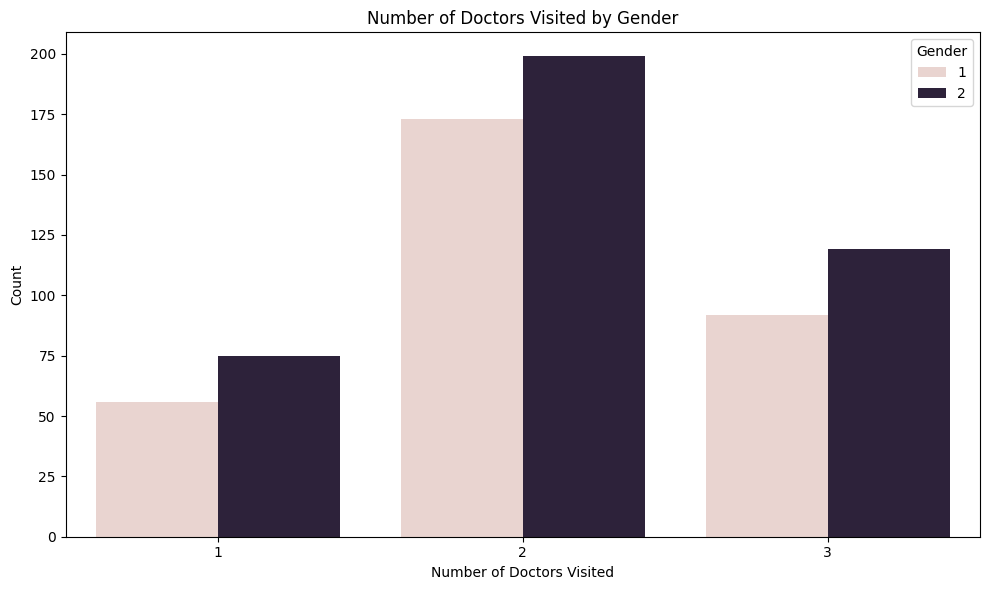

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Gender vs Doctors Visited
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x="Number of Doctors Visited", hue="Gender")
plt.xlabel("Number of Doctors Visited")
plt.title("Number of Doctors Visited by Gender")
plt.ylabel("Count")
plt.legend(title="Gender")
plt.tight_layout()
plt.show()


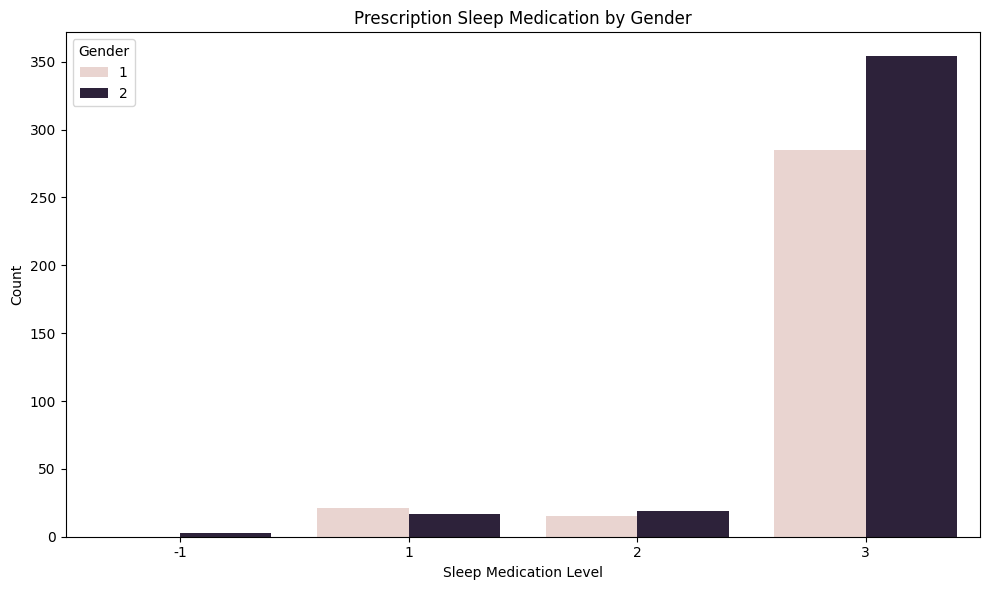

In [9]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x="Prescription Sleep Medication", hue="Gender")
plt.xlabel("Sleep Medication Level")
plt.ylabel("Count")
plt.title("Prescription Sleep Medication by Gender")
plt.legend(title="Gender")
plt.tight_layout()
plt.show()


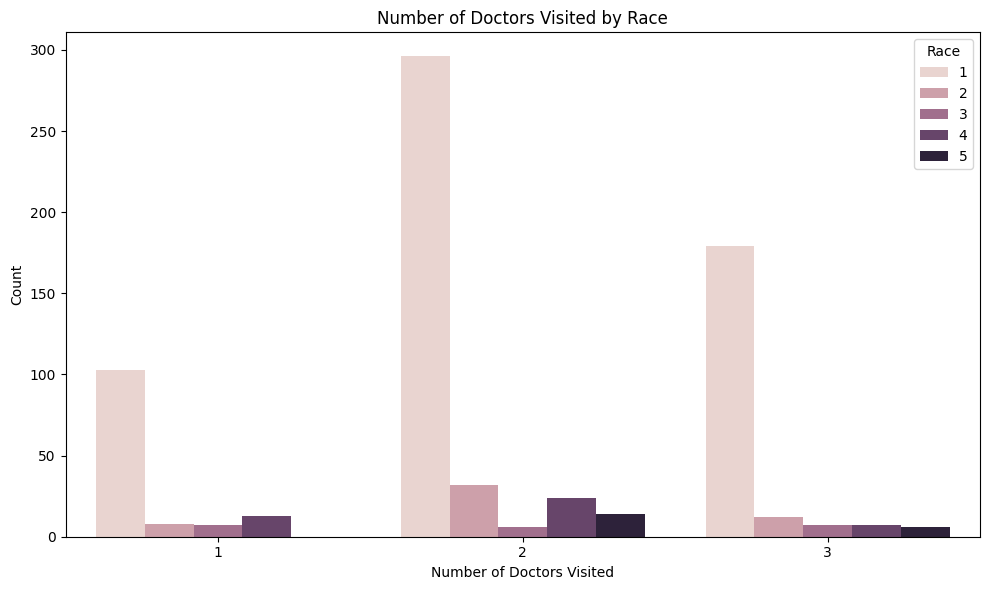

In [10]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x="Number of Doctors Visited", hue="Race")
plt.title("Number of Doctors Visited by Race")
plt.ylabel("Count")
plt.legend(title="Race")
plt.xlabel("Number of Doctors Visited")
plt.tight_layout()
plt.show()


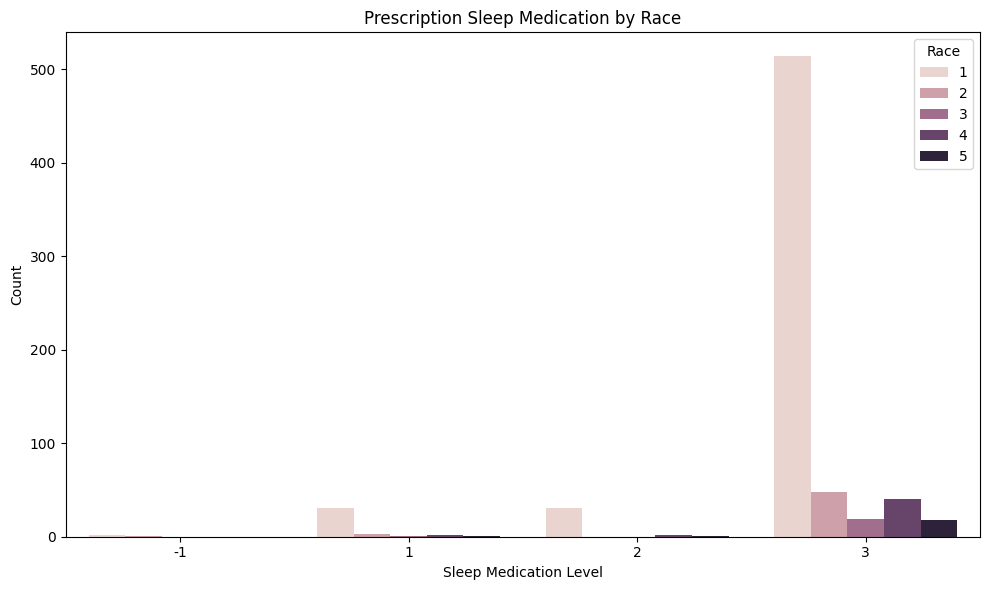

In [11]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x="Prescription Sleep Medication", hue="Race")
plt.title("Prescription Sleep Medication by Race")
plt.ylabel("Count")
plt.legend(title="Race")
plt.xlabel("Sleep Medication Level")
plt.tight_layout()
plt.show()


In [13]:
# Below are help functions from WIT Model Comparison https://pair-code.github.io/what-if-tool/get-started/

import pandas as pd
import numpy as np
import tensorflow as tf
import functools

# Creates a tf feature spec from the dataframe and columns specified.
def create_feature_spec(df, columns=None):
    feature_spec = {}
    if columns == None:
        columns = df.columns.values.tolist()
    for f in columns:
        if df[f].dtype is np.dtype(np.int64):
            feature_spec[f] = tf.io.FixedLenFeature(shape=(), dtype=tf.int64)
        elif df[f].dtype is np.dtype(np.float64):
            feature_spec[f] = tf.io.FixedLenFeature(shape=(), dtype=tf.float32)
        else:
            feature_spec[f] = tf.io.FixedLenFeature(shape=(), dtype=tf.string)
    return feature_spec

# Creates simple numeric and categorical feature columns from a feature spec and a
# list of columns from that spec to use.
#
# NOTE: Models might perform better with some feature engineering such as bucketed
# numeric columns and hash-bucket/embedding columns for categorical features.
def create_feature_columns(columns, feature_spec):
    ret = []
    for col in columns:
        if feature_spec[col].dtype is tf.int64 or feature_spec[col].dtype is tf.float32:
            ret.append(tf.feature_column.numeric_column(col))
        else:
            ret.append(tf.feature_column.indicator_column(
                tf.feature_column.categorical_column_with_vocabulary_list(col, list(df[col].unique()))))
    return ret

# An input function for providing input to a model from tf.Examples
def tfexamples_input_fn(examples, feature_spec, label, mode=tf.estimator.ModeKeys.EVAL,
                       num_epochs=None, 
                       batch_size=64):
    def ex_generator():
        for i in range(len(examples)):
            yield examples[i].SerializeToString()
    dataset = tf.data.Dataset.from_generator(
      ex_generator, tf.dtypes.string, tf.TensorShape([]))
    if mode == tf.estimator.ModeKeys.TRAIN:
        dataset = dataset.shuffle(buffer_size=2 * batch_size + 1)
    dataset = dataset.batch(batch_size)
    dataset = dataset.map(lambda tf_example: parse_tf_example(tf_example, label, feature_spec))
    dataset = dataset.repeat(num_epochs)
    return dataset

# Parses Tf.Example protos into features for the input function.
def parse_tf_example(example_proto, label, feature_spec):
    parsed_features = tf.io.parse_example(serialized=example_proto, features=feature_spec)
    target = parsed_features.pop(label)
    return parsed_features, target

# Converts a dataframe into a list of tf.Example protos.
def df_to_examples(df, columns=None):
    examples = []
    if columns == None:
        columns = df.columns.values.tolist()
    for index, row in df.iterrows():
        example = tf.train.Example()
        for col in columns:
            if df[col].dtype is np.dtype(np.int64):
                example.features.feature[col].int64_list.value.append(int(row[col]))
            elif df[col].dtype is np.dtype(np.float64):
                example.features.feature[col].float_list.value.append(row[col])
            elif row[col] == row[col]:
                example.features.feature[col].bytes_list.value.append(row[col].encode('utf-8'))
        examples.append(example)
    return examples

# Converts a dataframe column into a column of 0's and 1's based on the provided test.
# Used to force label columns to be numeric for binary classification using a TF estimator.
def make_label_column_numeric(df, label_column, test):
  df[label_column] = np.where(test(df[label_column]), 1, 0)

# Disparate Impact Remover from https://www.kaggle.com/code/mohammadbolandraftar/bias-mitigation-disparate-impact-remover-aif360

from aif360.algorithms.preprocessing import DisparateImpactRemover
from aif360.datasets import BinaryLabelDataset, Dataset
from aif360.metrics import BinaryLabelDatasetMetric

def apply_dir(rep_lev, bin_label_data):
    di_remover = DisparateImpactRemover(repair_level=rep_lev)
    binary_label_dataset_transformed = di_remover.fit_transform(bin_label_data)
    df_transformed = binary_label_dataset_transformed.convert_to_dataframe()[0] # create the transformed dataframe
    return df_transformed

ImportError: cannot import name 'formatargspec' from 'inspect' (/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/inspect.py)

In [ ]:
#@title Read training dataset from CSV {display-mode: "form"}

import pandas as pd

from ucimlrepo import fetch_ucirepo

# fetch dataset
csv_path = "NPHA-doctor-visits1.csv"

# Set the path to the CSV containing the dataset to train on.
#csv_path = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'

# Set the column names for the columns in the CSV. If the CSV's first line is a header line containing
# the column names, then set this to None.
#csv_columns = [
#  "Age", "Workclass", "fnlwgt", "Education", "Education-Num", "Marital-Status",
#  "Occupation", "Relationship", "Race", "Sex", "Capital-Gain", "Capital-Loss",
#  "Hours-per-week", "Country", "Over-50K"]

csv_columns = ['Age','Physical-Health','Mental-Health','Dental-Health','Employment','Stress-Keeps-Patient-from-Sleeping','Medication-Keeps-Patient-from-Sleeping','Pain-Keeps-Patient-from-Sleeping','Bathroom-Needs-Keeps-Patient-from-Sleeping','Uknown-Keeps-Patient-from-Sleeping','Trouble-Sleeping','Prescription-Sleep-Medication','Race','Gender']

# Read the dataset from the provided CSV and print out information about it.
df = pd.read_csv(csv_path, names=csv_columns, skipinitialspace=True)

df


  Using cached ucimlrepo-0.0.7-py3-none-any.whl.metadata (5.5 kB)
Using cached ucimlrepo-0.0.7-py3-none-any.whl (8.0 kB)
Note: you may need to restart the kernel to use updated packages.


,Age,Physical-Health,Mental-Health,Dental-Health,Employment,Stress-Keeps-Patient-from-Sleeping,Medication-Keeps-Patient-from-Sleeping,Pain-Keeps-Patient-from-Sleeping,Bathroom-Needs-Keeps-Patient-from-Sleeping,Uknown-Keeps-Patient-from-Sleeping,Trouble-Sleeping,Prescription-Sleep-Medication,Race,Gender
3,2,4,3,3,3,0,0,0,0,1,2,3,1,2
2,2,4,2,3,3,1,0,0,1,0,3,3,1,1
3,2,3,2,3,3,0,0,0,0,1,3,3,4,1
1,2,3,2,3,3,0,0,0,1,0,3,3,4,2
3,2,3,3,3,3,1,0,0,0,0,2,3,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2,2,2,2,2,3,0,0,0,1,0,3,3,1,1
3,2,2,2,2,2,1,0,0,0,1,2,3,1,2
3,2,4,2,3,3,0,0,0,0,0,3,3,1,1
3,2,3,1,3,3,1,0,1,1,1,3,3,1,2


In [16]:
#@title Specify input columns and column to predict {display-mode: "form"}
import numpy as np

# Set the column in the dataset you wish for the model to predict
#label_column = 'Over-50K'

label_column = 'Physical-Health'

# Make the label column numeric (0 and 1), for use in our model.
# In this case, examples with a target value of '>50K' are considered to be in
# the '1' (positive) class and all other examples are considered to be in the
# '0' (negative) class.
make_label_column_numeric(df, label_column, lambda val: val>3)

# Set list of all columns from the dataset we will use for model input.
#input_features = [
#  'Age', 'Workclass', 'Education', 'Marital-Status', 'Occupation',
#  'Relationship', 'Race', 'Sex', 'Capital-Gain', 'Capital-Loss',
#  'Hours-per-week', 'Country']

input_features = ['Age','Dental-Health','Mental-Health','Employment','Stress-Keeps-Patient-from-Sleeping','Medication-Keeps-Patient-from-Sleeping','Pain-Keeps-Patient-from-Sleeping','Bathroom-Needs-Keeps-Patient-from-Sleeping','Uknown-Keeps-Patient-from-Sleeping','Trouble-Sleeping','Prescription-Sleep-Medication','Race','Gender']

# Create a list containing all input features and the label column
features_and_labels = input_features + [label_column]

# Convert DataFrame to BinaryLabelDataset
binary_label_dataset = BinaryLabelDataset(df=df, # Our goal is to transform the df dataset
                                        label_names=['Physical-Health'],
                                        protected_attribute_names=['Gender', 'Race'],
                                        favorable_label=0, # non-default
                                        unfavorable_label=1, # default label
                                        )

df_transformed = apply_dir(0.9, binary_label_dataset) # repair_level=0.9

df_transformed = df_transformed.astype(int)
df_transformed

df_transformed
     

NameError: name 'make_label_column_numeric' is not defined

In [ ]:
#@title Convert dataset to tf.Example protos {display-mode: "form"}

examples = df_to_examples(df_transformed)

In [ ]:

#@title Create and train the linear classifier {display-mode: "form"}

num_steps = 2000  #@param {type: "number"}

# Create a feature spec for the classifier
feature_spec = create_feature_spec(df_transformed, features_and_labels)

# Define and train the classifier
train_inpf = functools.partial(tfexamples_input_fn, examples, feature_spec, label_column)
classifier = tf.estimator.LinearClassifier(
    feature_columns=create_feature_columns(input_features, feature_spec))
classifier.train(train_inpf, steps=num_steps)

In [ ]:

#@title Create and train the DNN classifier {display-mode: "form"}
num_steps_2 = 2000  #@param {type: "number"}

classifier2 = tf.estimator.DNNClassifier(
    feature_columns=create_feature_columns(input_features, feature_spec),
    hidden_units=[128, 64, 32])
classifier2.train(train_inpf, steps=num_steps_2)

In [ ]:

#@title Invoke What-If Tool for test data and the trained models {display-mode: "form"}

num_datapoints = 2000  #@param {type: "number"}
tool_height_in_px = 1000  #@param {type: "number"}

from witwidget.notebook.visualization import WitConfigBuilder
from witwidget.notebook.visualization import WitWidget

# Load up the test dataset
test_csv_path = 'NPHA-doctor-visits1.csv'
#test_df = pd.read_csv(test_csv_path, names=csv_columns, skipinitialspace=True,
  #skiprows=1)
test_df = df_transformed
make_label_column_numeric(test_df, label_column, lambda val: val>3)
test_examples = df_to_examples(test_df[0:num_datapoints])

# Setup the tool with the test examples and the trained classifier
config_builder = WitConfigBuilder(test_examples[0:num_datapoints]).set_estimator_and_feature_spec(
    classifier, feature_spec).set_compare_estimator_and_feature_spec(
    classifier2, feature_spec)
a = WitWidget(config_builder, height=tool_height_in_px)

## Graphs for Step 5

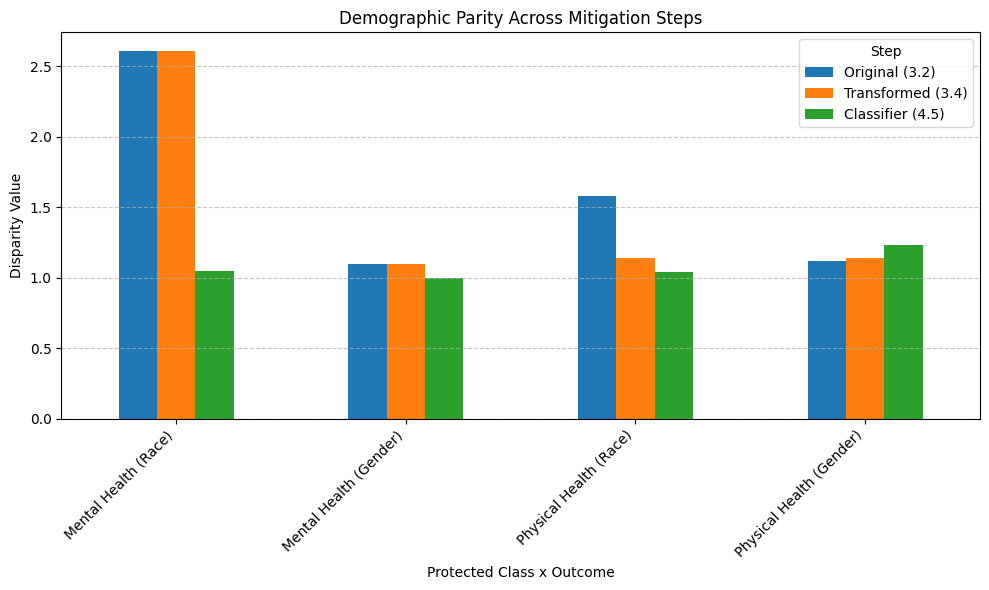

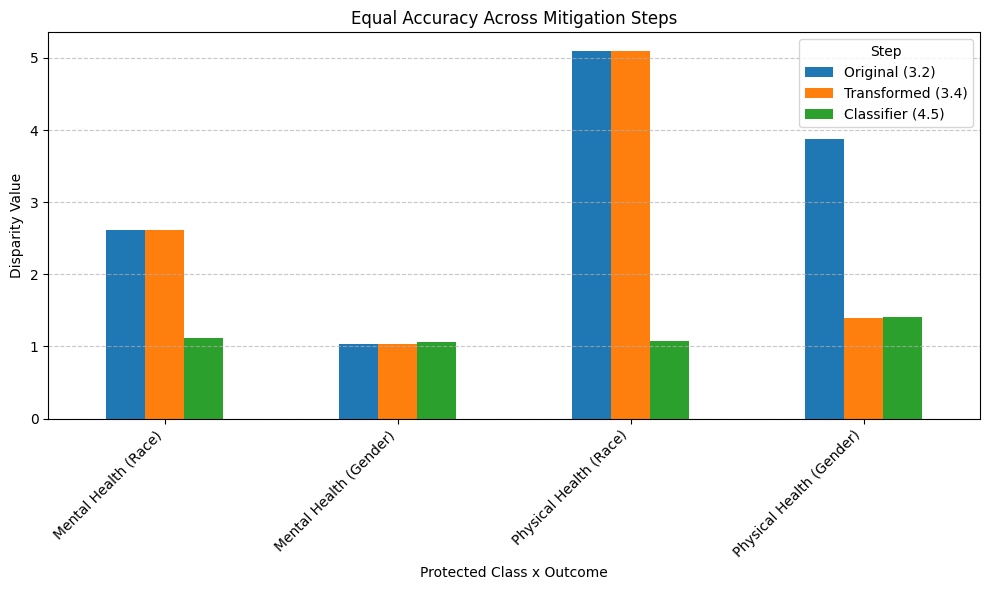

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Fairness values across steps (from user's report)
data = {
    "Subgroup": [
        "Mental Health (Race)", "Mental Health (Gender)",
        "Physical Health (Race)", "Physical Health (Gender)"
    ],
    "Original (3.2)": [2.61, 1.10, 1.58, 1.12],
    "Transformed (3.4)": [2.61, 1.10, 1.14, 1.14],
    "Classifier (4.5)": [1.05, 1.00, 1.04, 1.23]
}
df_dp = pd.DataFrame(data).set_index("Subgroup")

# Equal Accuracy values
data_eq = {
    "Subgroup": [
        "Mental Health (Race)", "Mental Health (Gender)",
        "Physical Health (Race)", "Physical Health (Gender)"
    ],
    "Original (3.2)": [2.61, 1.04, 5.10, 3.88],
    "Transformed (3.4)": [2.61, 1.04, 5.10, 1.39],
    "Classifier (4.5)": [1.12, 1.06, 1.08, 1.41]
}
df_eq = pd.DataFrame(data_eq).set_index("Subgroup")

# Plot Demographic Parity
ax1 = df_dp.plot(kind="bar", figsize=(10, 6))
plt.title("Demographic Parity Across Mitigation Steps")
plt.ylabel("Disparity Value")
plt.xlabel("Protected Class x Outcome")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Step")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Plot Equal Accuracy
ax2 = df_eq.plot(kind="bar", figsize=(10, 6))
plt.title("Equal Accuracy Across Mitigation Steps")
plt.ylabel("Disparity Value")
plt.xlabel("Protected Class x Outcome")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Step")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
